# Téma projektu - Zlyhanie srdca prediction dataset
* Age - Vek
* Sex - Pohlavie
* ChestPainType - Typ bolesti na hrudníku
* RestingBP - Pokojový krvný tlak
* Cholesterol
* FastingBS - Hladina krvy nalačno
* RestingECG - Výsledky pokojového elektrokardiogramu
* MaxHR - Maximálny srdcový tep
* ExerciseAngina - Angína vyvolaná cvičením
* Oldpeak - 
* ST_Slope - Korelácia srdcového tepu (diagram)
* HeartDisease - Srdcové choroby

In [1]:
import pandas as pd
import numpy as np

file = pd.read_csv('heart.csv', sep=',')
file

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [2]:
heartDS = pd.get_dummies(file, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"], drop_first=False)

In [3]:
heartDS.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [4]:
heartDS.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

# Rozdelenie dát a predikcia

In [5]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X_train, X_test, y_train, y_test = train_test_split(heartDS[['Sex_F','Sex_M','Cholesterol','MaxHR','Age','FastingBS']], heartDS['HeartDisease'], test_size = 0.2)

In [6]:
clf = DecisionTreeClassifier(max_depth=4)

In [7]:
clf = clf.fit(X_train, y_train)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print("Presnost: ", metrics.accuracy_score(y_test, y_pred))

Presnost:  0.7391304347826086


In [10]:
#!pip install pydotplus

import pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
vlastnosti = ['Sex_F','Sex_M','Cholesterol','MaxHR','Age','FastingBS']

In [11]:
import numpy as np
from sklearn.tree import _tree

def tree_to_code(tree, feature_names, Y):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    pathto=dict()

    global k
    k = 0
    def recurse(node, depth, parent):
        global k
        indent = "  " * depth

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            s= "{} <= {} ".format( name, threshold, node )
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s

            recurse(tree_.children_left[node], depth + 1, node)
            s="{} > {}".format( name, threshold)
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s
            recurse(tree_.children_right[node], depth + 1, node)
        else:
            k=k+1
            print(k,')',pathto[parent], tree_.value[node])
    recurse(0, 1, 0)
   
tree_to_code(clf, vlastnosti, y_train)

1 ) MaxHR <= 132.5  & Sex_F <= 0.5  & FastingBS <= 0.5  & Age <= 53.5  [[22. 47.]]
2 ) MaxHR <= 132.5  & Sex_F <= 0.5  & FastingBS <= 0.5  & Age > 53.5 [[ 22. 107.]]
3 ) MaxHR <= 132.5  & Sex_F <= 0.5  & FastingBS > 0.5 & Cholesterol <= 212.0  [[ 0. 56.]]
4 ) MaxHR <= 132.5  & Sex_F <= 0.5  & FastingBS > 0.5 & Cholesterol > 212.0 [[ 5. 27.]]
5 ) MaxHR <= 132.5  & Sex_F > 0.5 & Cholesterol <= 74.5  & MaxHR <= 126.5  [[0. 4.]]
6 ) MaxHR <= 132.5  & Sex_F > 0.5 & Cholesterol <= 74.5  & MaxHR > 126.5 [[1. 0.]]
7 ) MaxHR <= 132.5  & Sex_F > 0.5 & Cholesterol > 74.5 & MaxHR <= 114.5  [[6. 5.]]
8 ) MaxHR <= 132.5  & Sex_F > 0.5 & Cholesterol > 74.5 & MaxHR > 114.5 [[23.  4.]]
9 ) MaxHR > 132.5 & Cholesterol <= 42.5  & FastingBS <= 0.5  & MaxHR <= 139.0  [[2. 0.]]
10 ) MaxHR > 132.5 & Cholesterol <= 42.5  & FastingBS <= 0.5  & MaxHR > 139.0 [[4. 9.]]
11 ) MaxHR > 132.5 & Cholesterol <= 42.5  & FastingBS > 0.5 & Age <= 62.5  [[ 0. 22.]]
12 ) MaxHR > 132.5 & Cholesterol <= 42.5  & FastingBS > 0.

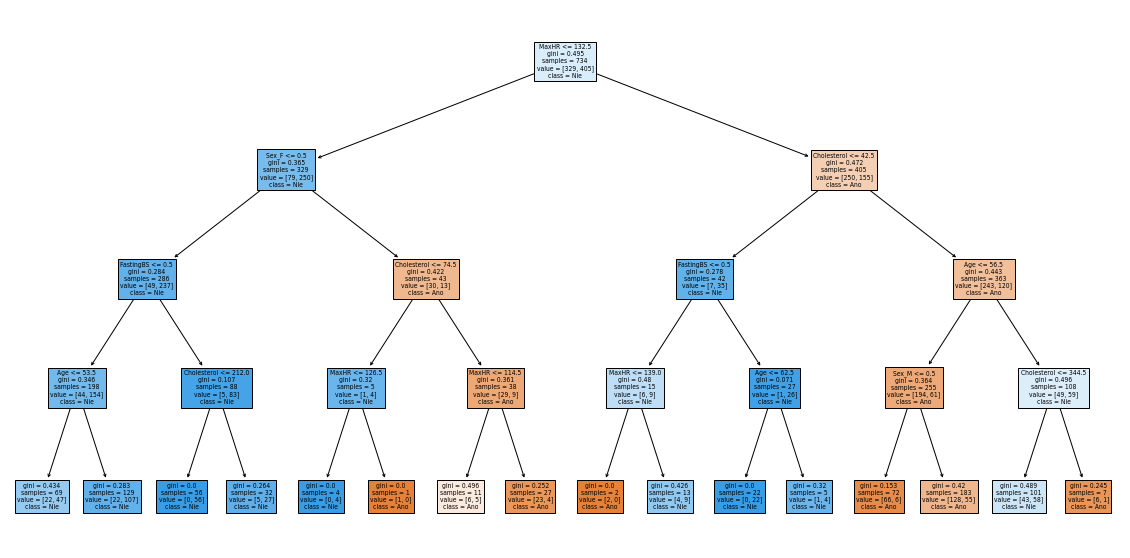

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf, feature_names=vlastnosti, filled=True, class_names=['Ano', 'Nie'])